## Assignment 1 - Machine Learning Project
### Project 1: Classify Images of Colon Cancer
##### Group No. 3: Sheikh Abdul Munim (s4076159), Liya Benoy (s4027344)

In [4]:
#importing required libraries
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random

In [5]:
#importing the data labels (main+extra)
labels_main = pd.read_csv('Image_classification_data\data_labels_mainData.csv')
labels_extra = pd.read_csv('Image_classification_data\data_labels_extraData.csv')
print(labels_main.head())
print(labels_extra.head())

   InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous
0       22405          1  22405.png   fibroblast         0            0
1       22406          1  22406.png   fibroblast         0            0
2       22407          1  22407.png   fibroblast         0            0
3       22408          1  22408.png   fibroblast         0            0
4       22409          1  22409.png   fibroblast         0            0
   InstanceID  patientID  ImageName  isCancerous
0       12681         61  12681.png            0
1       12682         61  12682.png            0
2       12683         61  12683.png            0
3       12684         61  12684.png            0
4       12685         61  12685.png            0


In [6]:
#navigating to folder containing colon cell histopathology images
image_folder = 'Image_classification_data\patch_images'
images = os.listdir(image_folder)
print(f"Total images: {len(images)}")

Total images: 20280


In [7]:
#checking if there are extra images in images folder that are not given in data labels
images_set = set(images)
csv_images_set = set(labels_main['ImageName'].astype(str))  #no '.png' added!
print("Images in CSV but missing from folder:", csv_images_set - images_set)
print("Images in folder but missing from CSV:", images_set - csv_images_set)
#use only images that are listed in the CSV file
images_filtered = [img for img in images if img in csv_images_set]

Images in CSV but missing from folder: set()
Images in folder but missing from CSV: {'10641.png', '16075.png', '2868.png', '2934.png', '15089.png', '14944.png', '12513.png', '7186.png', '15645.png', '11708.png', '9744.png', '10399.png', '14869.png', '20904.png', '9639.png', '15892.png', '11492.png', '20774.png', '14627.png', '15680.png', '6326.png', '2051.png', '17874.png', '21306.png', '19297.png', '21800.png', '6059.png', '6003.png', '1645.png', '14555.png', '11112.png', '5379.png', '5160.png', '13041.png', '14781.png', '6453.png', '5211.png', '20830.png', '19761.png', '20773.png', '13087.png', '15085.png', '19103.png', '12530.png', '7606.png', '3736.png', '7055.png', '5279.png', '16316.png', '20696.png', '6421.png', '15273.png', '14239.png', '1984.png', '21931.png', '21453.png', '2971.png', '5817.png', '7286.png', '18073.png', '10443.png', '15889.png', '1821.png', '22162.png', '10606.png', '3676.png', '14264.png', '19610.png', '7247.png', '18806.png', '5124.png', '9679.png', '11180.

In [8]:
#defining function to load images
def load_images(image_folder, image_list):
    """Returns a dictionary mapping image names to PIL image objects."""
    images = {}
    for img_name in image_list:
        img_path = os.path.join(image_folder, img_name)
        try:
            with Image.open(img_path) as img:
                images[img_name] = img.copy()  # Copy to keep it after closing
        except Exception as e:
            print(f"Error loading {img_name}: {e}")
    return images
#loading the images
image_objects = load_images(image_folder, labels_main['ImageName'])
#adding a new column 'Image' to labels_main
labels_main['Image'] = labels_main['ImageName'].map(image_objects)
print(labels_main.head())

   InstanceID  patientID  ImageName cellTypeName  cellType  isCancerous  \
0       22405          1  22405.png   fibroblast         0            0   
1       22406          1  22406.png   fibroblast         0            0   
2       22407          1  22407.png   fibroblast         0            0   
3       22408          1  22408.png   fibroblast         0            0   
4       22409          1  22409.png   fibroblast         0            0   

                                               Image  
0  <PIL.Image.Image image mode=RGB size=27x27 at ...  
1  <PIL.Image.Image image mode=RGB size=27x27 at ...  
2  <PIL.Image.Image image mode=RGB size=27x27 at ...  
3  <PIL.Image.Image image mode=RGB size=27x27 at ...  
4  <PIL.Image.Image image mode=RGB size=27x27 at ...  


In [11]:
#fetching a single sample (e.g., for index 0)
index = 0
sample = labels_main.iloc[index]
#extracting the image, cancer label, and cell type for this sample
img = sample['Image']
cancer_label = sample['isCancerous']  # Assuming this is the correct column name
cell_type = sample['cellTypeName']  # Assuming this is the correct column name
#printing the results
if img:
    print(f"Image Size: {img.size}, Cancer Label: {cancer_label}, Cell Type: {cell_type}")
else:
    print("Error: Image not found.")

Image Size: (27, 27), Cancer Label: 0, Cell Type: fibroblast


### Exploratory Data Analysis (EDA)

In [12]:
#fetching the dimensions of the data
print(labels_main.shape)
print(labels_main.describe())

(9896, 7)
         InstanceID    patientID     cellType  isCancerous
count   9896.000000  9896.000000  9896.000000  9896.000000
mean   10193.880154    29.762025     1.501516     0.412187
std     6652.912660    17.486553     0.954867     0.492253
min        1.000000     1.000000     0.000000     0.000000
25%     4135.750000    14.000000     1.000000     0.000000
50%     9279.500000    26.000000     2.000000     0.000000
75%    16821.250000    47.000000     2.000000     1.000000
max    22444.000000    60.000000     3.000000     1.000000


C:\Users\liyab\AppData\Local\Temp\ipykernel_27524\3054737391.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=labels_main, x='isCancerous', palette='viridis')


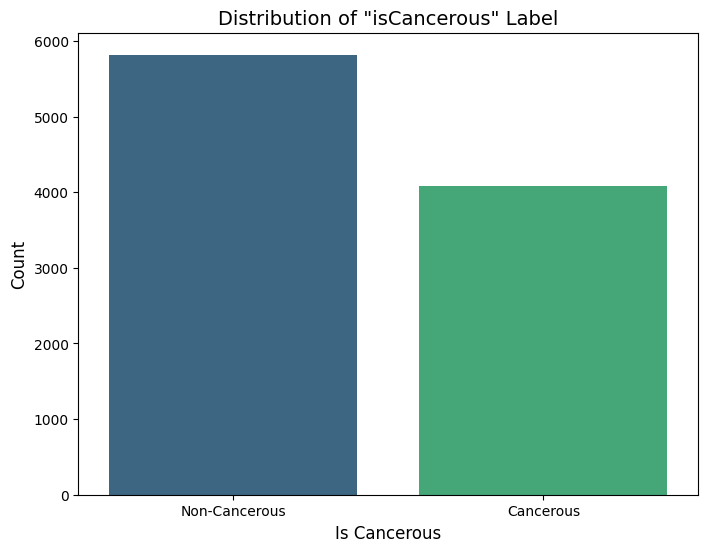

In [13]:
# Plotting the distribution of the 'inCancerous' label
plt.figure(figsize=(8, 6))
sns.countplot(data=labels_main, x='isCancerous', palette='viridis')
# Adding titles and labels
plt.title('Distribution of "isCancerous" Label', fontsize=14)
plt.xlabel('Is Cancerous', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['Non-Cancerous', 'Cancerous'])  # Adjust according to your label values
# Show the plot
plt.show()

C:\Users\liyab\AppData\Local\Temp\ipykernel_27524\3792667902.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=labels_main, x='cellTypeName', palette='Set2')


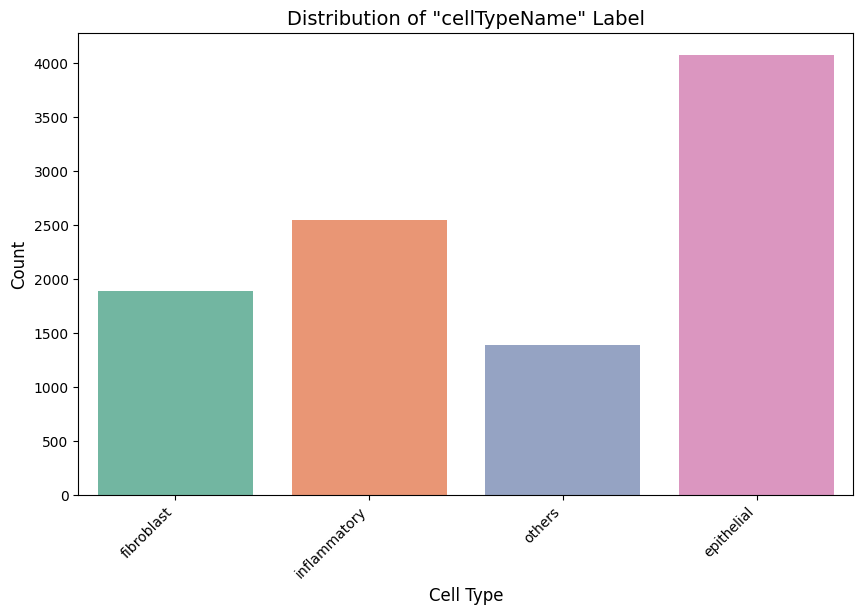

In [14]:
#plotting the distribution of the 'cellTypeName' label
plt.figure(figsize=(10, 6))
sns.countplot(data=labels_main, x='cellTypeName', palette='Set2')
#adding titles and labels
plt.title('Distribution of "cellTypeName" Label', fontsize=14)
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

In [15]:
#checking for missing values in the entire DataFrame
missing_values = labels_main.isnull().sum()
#displaying the columns with missing values
print("Missing values in each column:")
print(missing_values)
#optionally, you can filter columns with missing values only
missing_columns = missing_values[missing_values > 0]
print("\nColumns with missing values:")
print(missing_columns)


Missing values in each column:
InstanceID      0
patientID       0
ImageName       0
cellTypeName    0
cellType        0
isCancerous     0
Image           0
dtype: int64

Columns with missing values:
Series([], dtype: int64)


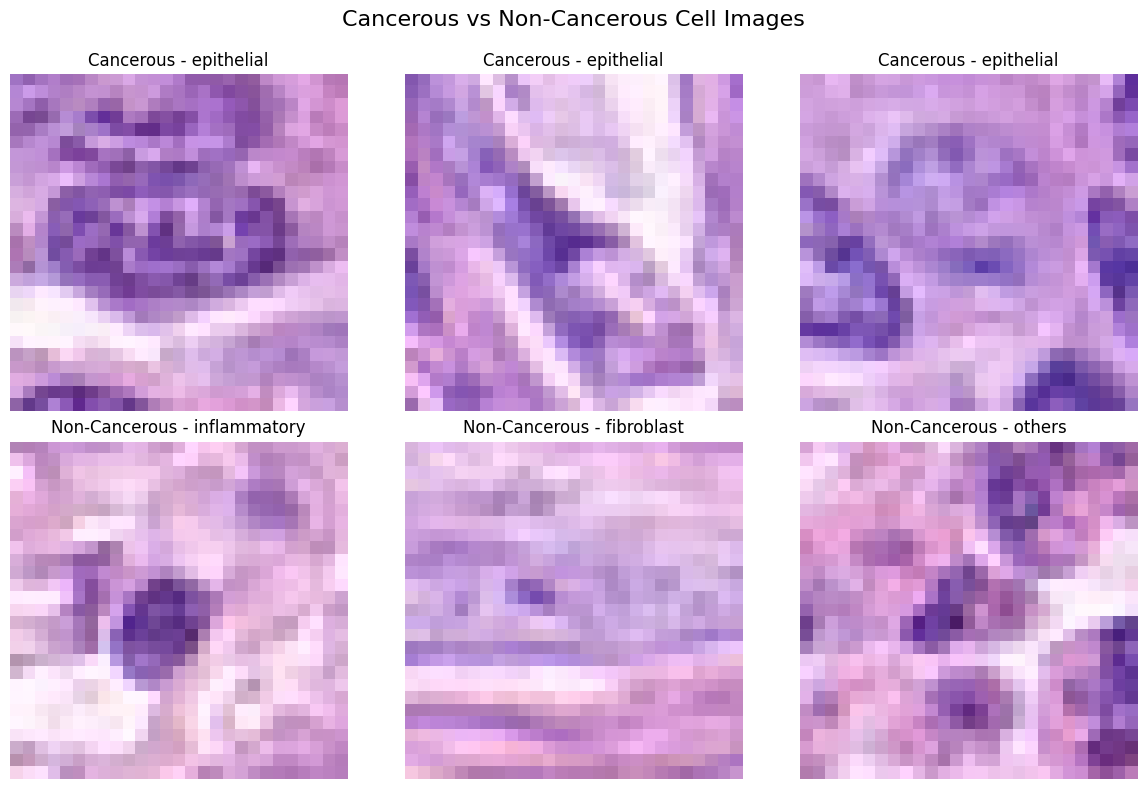

In [16]:
#filter the data based on the 'inCancerous' label (0 for non-cancerous, 1 for cancerous)
cancerous_cells = labels_main[labels_main['isCancerous'] == 1]
non_cancerous_cells = labels_main[labels_main['isCancerous'] == 0]
#sample some images for display (let's display 3 cancerous and 3 non-cancerous)
sample_cancerous_images = cancerous_cells.sample(3)
sample_non_cancerous_images = non_cancerous_cells.sample(3)
#plotting the images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
#display cancerous images
for i, (idx, row) in enumerate(sample_cancerous_images.iterrows()):
    ax = axes[0, i]
    img = row['Image']
    ax.imshow(img)
    ax.set_title(f"Cancerous - {row['cellTypeName']}")
    ax.axis('off')
#display non-cancerous images
for i, (idx, row) in enumerate(sample_non_cancerous_images.iterrows()):
    ax = axes[1, i]
    img = row['Image']
    ax.imshow(img)
    ax.set_title(f"Non-Cancerous - {row['cellTypeName']}")
    ax.axis('off')
#adding a main title
plt.suptitle('Cancerous vs Non-Cancerous Cell Images', fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

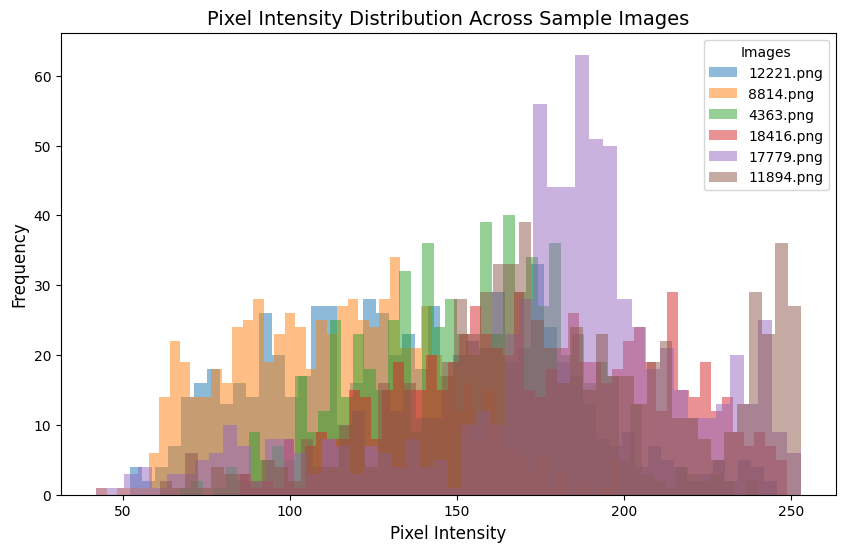

In [17]:
#function to calculate pixel intensity distribution for grayscale images
def plot_pixel_intensity_distribution(images, title="Pixel Intensity Distribution"):
    plt.figure(figsize=(10, 6))
    for idx, (img_name, img) in enumerate(images.items()):
        #convert image to grayscale
        img_gray = img.convert("L")  # Convert image to grayscale
        img_array = np.array(img_gray)  # Convert image to numpy array
        #flatten the image array to 1D and plot the histogram of pixel intensities
        plt.hist(img_array.flatten(), bins=50, alpha=0.5, label=img_name) 
    #adding title and labels
    plt.title(title, fontsize=14)
    plt.xlabel('Pixel Intensity', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend(title="Images", loc='upper right')
    plt.show()
#plotting the pixel intensity distribution for a few sample images (for cancerous and non-cancerous images)
sample_cancerous_images = cancerous_cells.sample(3)
sample_non_cancerous_images = non_cancerous_cells.sample(3)
#combine the selected images into one dictionary (for visualization)
sample_images = {}
for idx, row in sample_cancerous_images.iterrows():
    sample_images[row['ImageName']] = row['Image']
for idx, row in sample_non_cancerous_images.iterrows():
    sample_images[row['ImageName']] = row['Image']
#plotting the intensity distribution
plot_pixel_intensity_distribution(sample_images, title="Pixel Intensity Distribution Across Sample Images")

C:\Users\liyab\AppData\Local\Temp\ipykernel_27524\3073188320.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=patient_distribution.index, y=patient_distribution.values, palette="Set2")


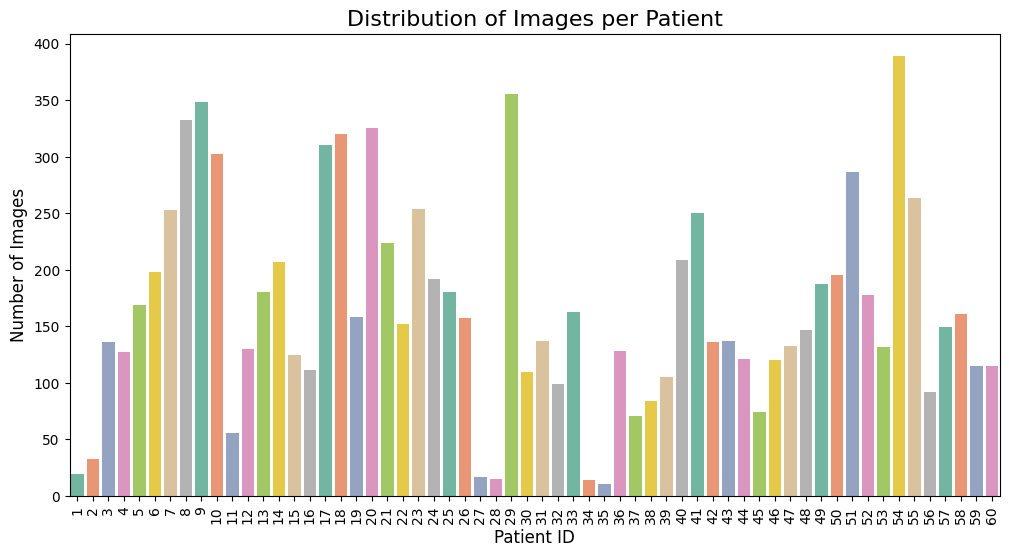

In [19]:
#grouping the data by PatientID and counting the number of images per patient
patient_distribution = labels_main['patientID'].value_counts()
#plotting the patient distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=patient_distribution.index, y=patient_distribution.values, palette="Set2")
#adding title and labels
plt.title('Distribution of Images per Patient', fontsize=16)
plt.xlabel('Patient ID', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

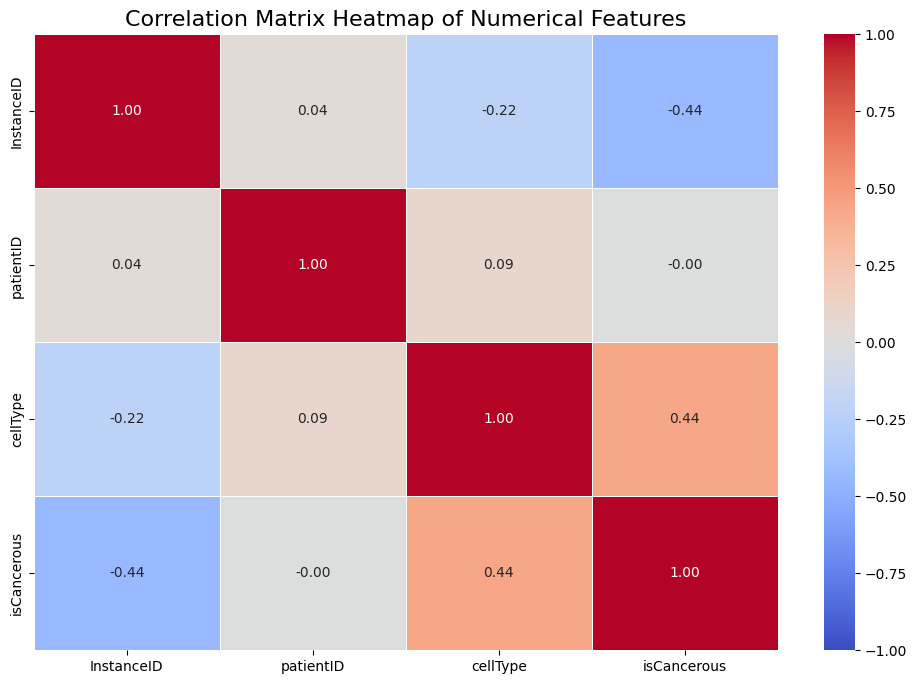

In [20]:
#select only numerical columns
numerical_features = labels_main.select_dtypes(include=['float64', 'int64'])
#calculate the correlation matrix
corr_matrix = numerical_features.corr()
#plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap of Numerical Features', fontsize=16)
plt.show()

In [21]:
#function to classify images as too bright or too dark based on average pixel intensity
def check_image_brightness(images, bright_threshold=200, dark_threshold=50):
    too_bright = []
    too_dark = []  
    for img_name, img in images.items():
        # Convert the image to grayscale
        img_gray = img.convert("L")
        img_array = np.array(img_gray)  # Convert image to numpy array
        #calculate the average pixel intensity
        avg_intensity = img_array.mean()
        #classify image as too bright or too dark
        if avg_intensity > bright_threshold:
            too_bright.append(img_name)
        elif avg_intensity < dark_threshold:
            too_dark.append(img_name)
    return too_bright, too_dark
#check the brightness of the images
too_bright_images, too_dark_images = check_image_brightness(image_objects)
#display the results
print("Too Bright Images:", too_bright_images)
print("Too Dark Images:", too_dark_images)

Too Bright Images: ['22408.png', '22409.png', '22423.png', '19036.png', '19043.png', '19045.png', '19049.png', '19050.png', '19062.png', '19066.png', '18945.png', '18653.png', '132.png', '133.png', '135.png', '153.png', '156.png', '158.png', '161.png', '162.png', '163.png', '164.png', '165.png', '167.png', '168.png', '172.png', '173.png', '175.png', '176.png', '177.png', '178.png', '179.png', '180.png', '181.png', '183.png', '184.png', '187.png', '190.png', '191.png', '192.png', '193.png', '194.png', '195.png', '196.png', '197.png', '198.png', '199.png', '200.png', '201.png', '203.png', '204.png', '205.png', '207.png', '212.png', '213.png', '215.png', '220.png', '221.png', '222.png', '223.png', '227.png', '228.png', '229.png', '230.png', '232.png', '233.png', '234.png', '235.png', '241.png', '242.png', '243.png', '253.png', '254.png', '256.png', '257.png', '260.png', '262.png', '264.png', '270.png', '271.png', '273.png', '274.png', '275.png', '4087.png', '4089.png', '4092.png', '4096.p

### Data Pre-processing

### Building Baseline Model: 